# Author: Nikita Sawant

## Techniqual Task 2 :- Predication using Unsupervised ML (Level - Beginner)

In this task, we are going to predict the optimum number of dusters from the given iris dataset and represent it visually.

In [29]:
# Importing important libararies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
import warnings
warnings.filterwarnings("ignore")

### Step 1 : Reading the dataset

In [30]:
# Loading and reading the dataset
data = pd.read_csv(r"C:\Users\NIKITA\Desktop\grip/Iris.csv")
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [31]:
data.shape

(150, 6)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [33]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Now, let's check for unique classes in the dataset

In [34]:
print(data.Species.nunique())
print(data.Species.value_counts())

3
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


### Step 2: Data Visualization

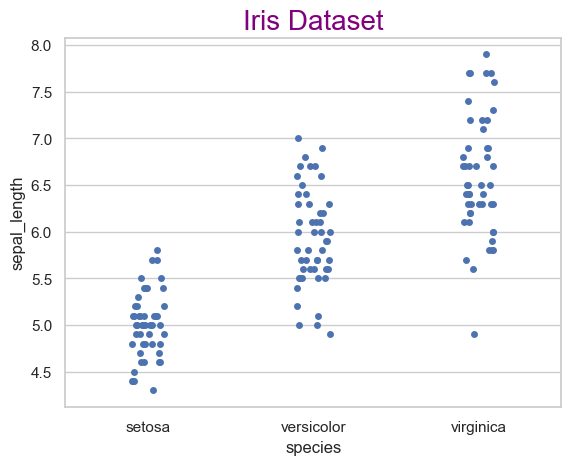

In [35]:
sns.set(style = "whitegrid")
iris = sns.load_dataset("iris");
ax = sns.stripplot(x ='species', y='sepal_length', data=iris);
plt.title("Iris Dataset", color = "Purple", fontsize="20")
plt.show()

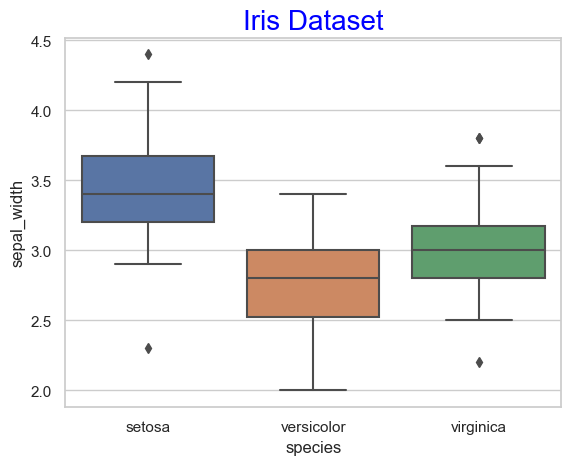

In [36]:
sns.boxplot(x='species', y='sepal_width',data=iris)
plt.title('Iris Dataset', color="blue", fontsize='20')
plt.show()

Text(0.5, 1.0, 'Iris Dataset')

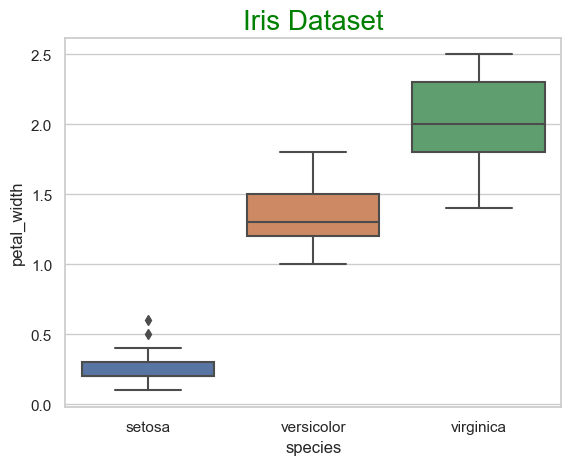

In [37]:
sns.boxplot(x='species', y='petal_width', data=iris)
plt.title('Iris Dataset', color='Green', fontsize='20')

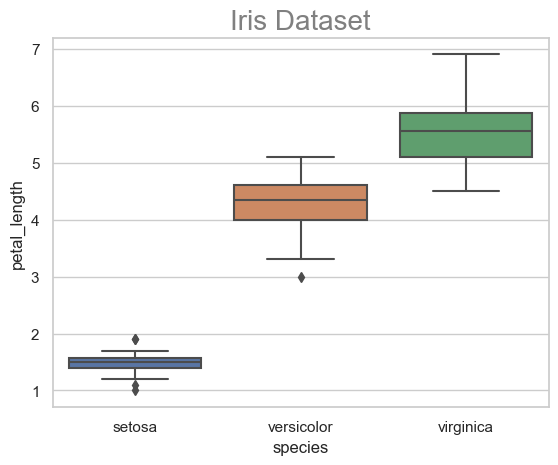

In [38]:
sns.boxplot(x='species', y='petal_length', data = iris)
plt.title('Iris Dataset', color='Grey', fontsize='20')
plt.show()


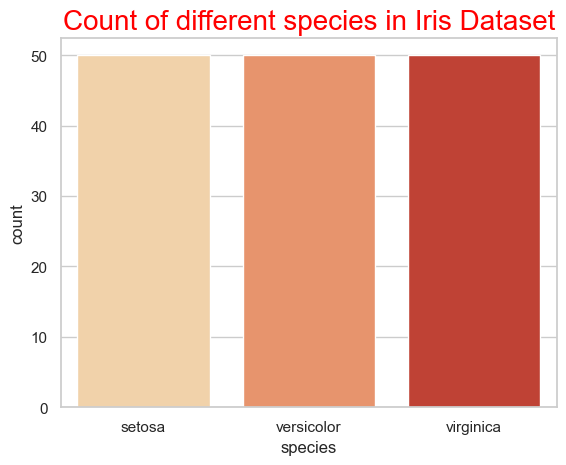

In [39]:
# count plot
sns.countplot(x='species', data=iris, palette='OrRd')
plt.title('Count of different species in Iris Dataset', color='red', fontsize='20')
plt.show()

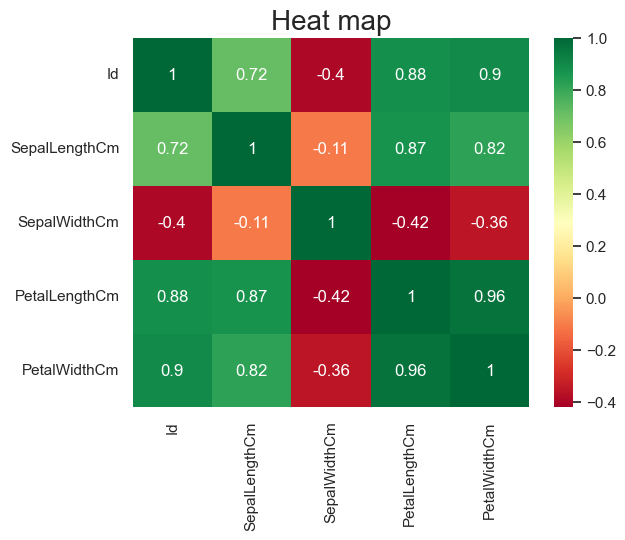

In [40]:
# Heat map
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')
plt.title('Heat map', fontsize='20')
plt.show()

### Step 3 : Finding the optimum number of cluster using k-means clustering


In [41]:
# finding the optimum number of clusters using k-meand clustering
x = data.iloc[:,[0,1,2,3]].values

from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init=10, random_state=0)
    kmeans.fit(x)
    ## appending the wcss to the list(kmeans.inertia_return the WCSS value for an intialized cluster)
    wcss.append(kmeans.inertia_)
    print('k:',i, 'wcss', kmeans.inertia_)

k: 1 wcss 281831.54466666665
k: 2 wcss 70581.38079999998
k: 3 wcss 31320.711200000005
k: 4 wcss 17758.79250355619
k: 5 wcss 11468.96874702381
k: 6 wcss 7921.863473076924
k: 7 wcss 5911.63236551854
k: 8 wcss 4541.979023391813
k: 9 wcss 3571.9110955882356
k: 10 wcss 2943.9331008403365


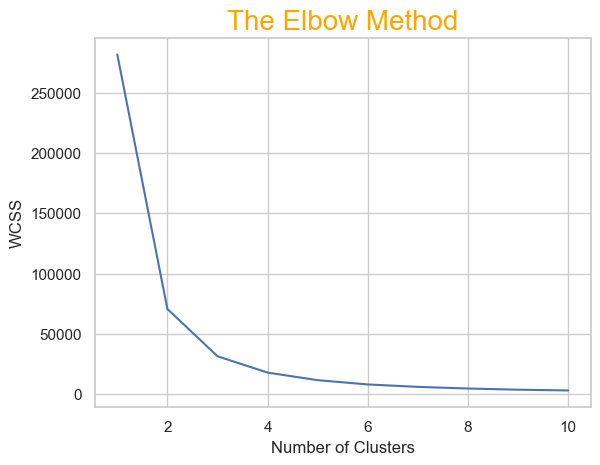

In [42]:
# plotting the results onto a line graph , allowing us to observ 'The Elbow'

plt.plot(range(1,11), wcss)
plt.title('The Elbow Method', color='Orange', fontsize='20')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

We can see that after 3 the drop in WCSS is minimal. So we choose 3 as the optimal number of clusters.

### Step 4 : Initializing K-Means with optimum number of clusters

In [43]:
# Fitting k-means to the dataset
kmeans = KMeans(n_clusters = 3, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Returns a label for each data point based on the number of clusters
y_kmeans = kmeans.fit_predict(x)

In [44]:
# Predicting values
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### Step 5 : Visualizing the Clusters


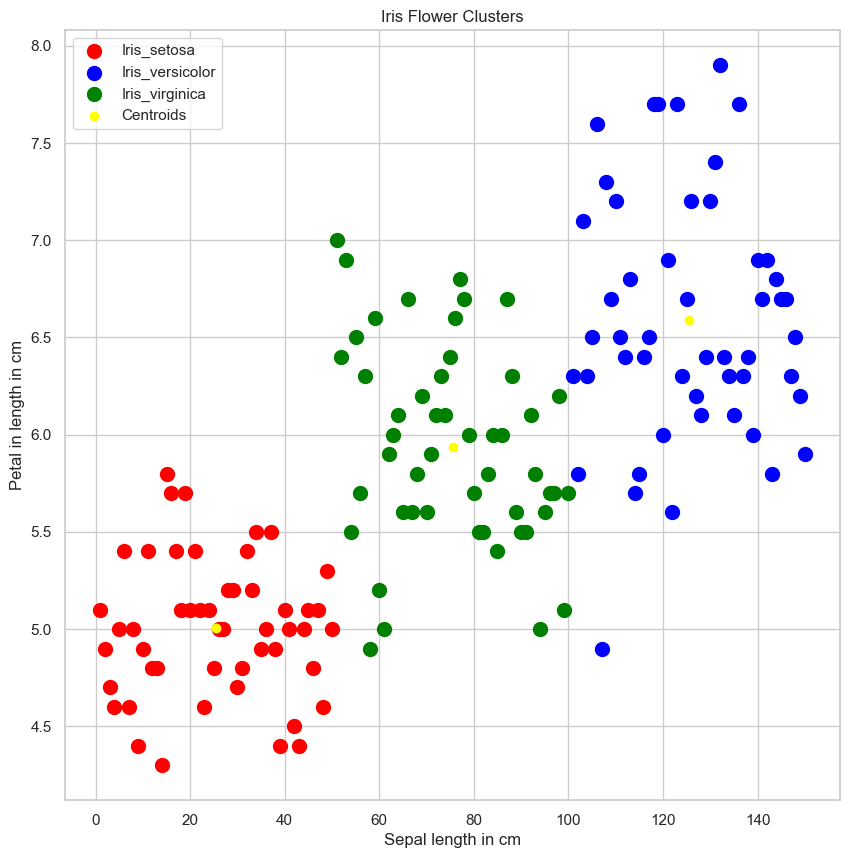

In [47]:
# Visualizing the clusters
plt.figure(figsize=(10,10))
plt.scatter(x[y_kmeans==0,0], x[y_kmeans==0,1],s=100, c='red', label = 'Iris_setosa')
plt.scatter(x[y_kmeans==1,0], x[y_kmeans==1,1], s=100, c='blue', label='Iris_versicolor')
plt.scatter(x[y_kmeans==2,0], x[y_kmeans==2,1], s=100, c='green', label='Iris_virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:,1],c='yellow', label='Centroids')
plt.title('Iris Flower Clusters')
plt.xlabel('Sepal length in cm')
plt.ylabel('Petal in length in cm')
plt.legend()
plt.show()